# Using color in your visualizations
> Color is a powerful tool for encoded values in data visualization. However, with this power comes danger. In this chapter, we talk about how to choose an appropriate color palette for your visualization based upon the type of data it is showing. This is the Summary of lecture "Improving Your Data Visualizations in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Visualization]
- image: 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Color in visualizations
- How color is used
    - Differentiates classes of data
    - Encodes continuous values
    - Should be used carefully
- Color can be misleading...
> "It is evident that the color-size illusion is present in a marked degree (no matter what) arrangement" - C.J Warden & E.L. Flynn, 1926

### Getting rid of unnecessary color
You might want to compare the relationship CO to NO2 values across cities using a simple scatter plot with color to differentiate the different cities' data.


In [2]:
pollution = pd.read_csv('./dataset/pollution_wide.csv')
pollution.head()

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


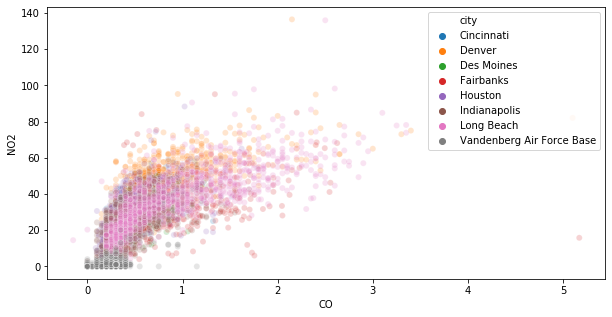

In [4]:
sns.scatterplot('CO', 'NO2',
                alpha = 0.2,
                hue = 'city',
                data = pollution);

Unfortunately, the resulting plot is very convoluted. It's hard to make out differences between the cities because one has to differentiate between similar colors. It turns out that sometimes the best color palette for your plot is no color at all.

To remedy this hard-to-read chart, get rid of the color component and facet by each city. While the resulting plot may not be as pretty, it will be a much better tool to decipher the differences.

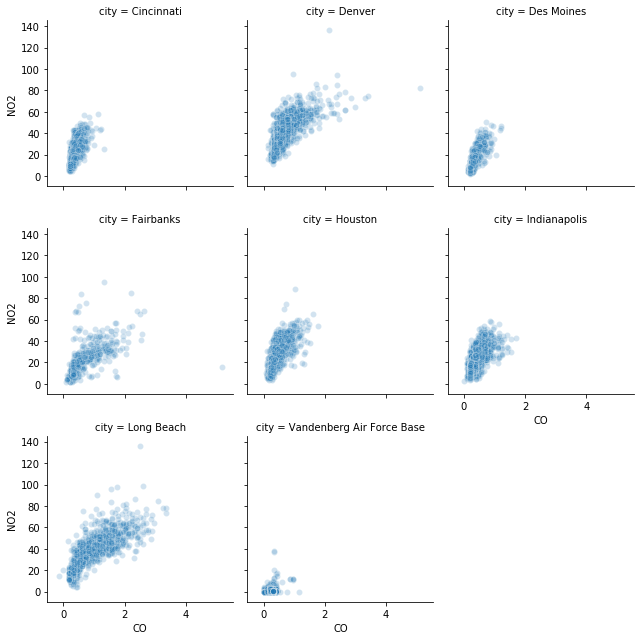

In [5]:
# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2);

This new faceted plot removes the pretty colors but becomes a whole lot more informative. In certain situations, if you can take something that is encoded in color and encode it in position instead, you often will increase the legibility of your chart. The balance between attractiveness and utility is something you need to balance in every plot you make.

### Fixing Seaborn's bar charts
Seaborn's default values for the colors of bars in a bar chart are not ideal for the most accurate perception. By drawing each bar as a different color, there is a risk of the viewer seeing two identical sized bars as different sizes as people tend to see some colors as 'larger' than others.

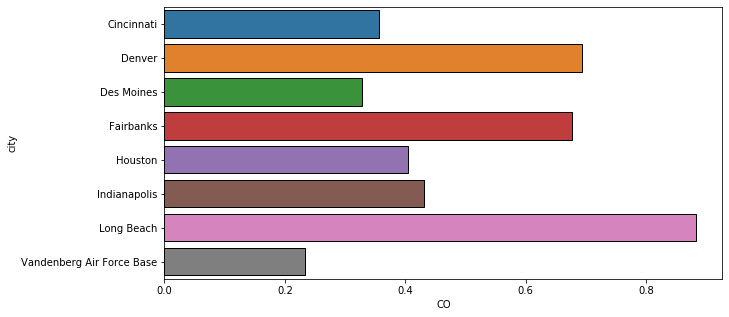

In [7]:
sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Add a border to the bars
            edgecolor = 'black');

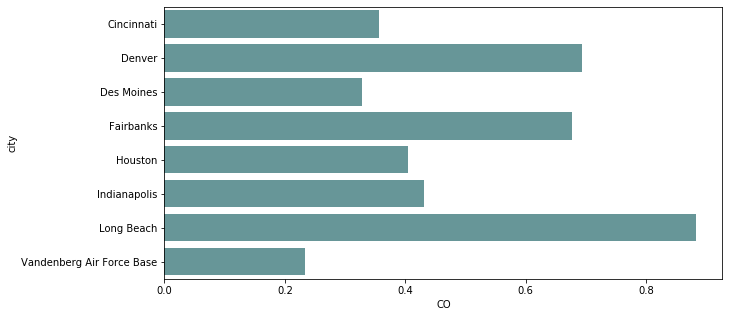

In [10]:
sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Replace border with bar colors
            color = 'cadetblue');

Adding borders is an easy and quick way to improve default bar charts without sacrificing some of the trippy colors. Spending a tiny bit more time to adjust the default colors will result in a more accurate and easy to read chart.